<a href="https://colab.research.google.com/github/zacherymoy/DS-Unit-4-Sprint-1-NLP/blob/master/ZacheryMoy_Topic_Modeling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

## Import libraries

In [0]:
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

## Load data csv

In [0]:
# Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19 on May 15, 2020


In [0]:
# import zipfile

# with zipfile.ZipFile("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv.zip","r") as zip_ref:
#     zip_ref.extractall("targetdir")

In [0]:
df = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [5]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,3.0,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,4.0,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-12-06T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5.0,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-03-28T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5.0,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-04-22T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5.0,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [0]:
# STOPWORDS = set(STOPWORDS).union(set(['said', 'mr', 'mrs']))

# def tokenize(text):
#     return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [0]:

# import os

# def gather_data(path_to_data): 
#     data = []
#     for f in os.listdir(path):
#         if os.path.isdir(f) == False:
#             if f[-3:] == 'txt':
#                 with open(os.path.join(path,f)) as t:
#                     text = t.read().strip('\n')
#                     data.append(tokenize(str(text)))       
#     return data

In [8]:
df['reviews.text'][0]


'I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.'

In [0]:
# Import my stuff

import numpy as np
import gensim
import spacy

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

In [10]:
!python -m spacy download en_core_web_lg


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [0]:
nlp = spacy.load("en_core_web_lg")


In [15]:
str(df['reviews.text'])

'0       I order 3 of them and one of the item is bad q...\n1       Bulk is always the less expensive way to go fo...\n2       Well they are not Duracell but for the price i...\n3       Seem to work as well as name brand batteries a...\n4       These batteries are very long lasting the pric...\n                              ...                        \n9700     love amazon batteries, great value for the money\n9701    Love having a stash of these basic replacement...\n9702                                              love it\n9703                                              love it\n9704                                                  NaN\nName: reviews.text, Length: 9705, dtype: object'

In [0]:
# int_lst = [int(x) for x in str_lst]

df['reviews.text'] = [str(x) for x in df['reviews.text']]

In [20]:
df['reviews.text']

0       I order 3 of them and one of the item is bad q...
1       Bulk is always the less expensive way to go fo...
2       Well they are not Duracell but for the price i...
3       Seem to work as well as name brand batteries a...
4       These batteries are very long lasting the pric...
                              ...                        
9700     love amazon batteries, great value for the money
9701    Love having a stash of these basic replacement...
9702                                              love it
9703                                              love it
9704                                                  nan
Name: reviews.text, Length: 9705, dtype: object

In [21]:
df['reviews.text'].dtype

dtype('O')

In [22]:
# set up tokens list
tokens = []

# use Spacy to tokenize the reviews
for doc in nlp.pipe(df['reviews.text']):
    
    doc_tokens = []
    
    for token in doc: # make sure they're not stopwords or punctuation
        if (token.is_stop != True) and (token.is_punct !=True):
            doc_tokens.append(token.lemma_.strip())
            
    tokens.append(doc_tokens)

tokens[:5]

[['order',
  '3',
  'item',
  'bad',
  'quality',
  'miss',
  'backup',
  'spring',
  'pc',
  'aluminum',
  'battery',
  'work'],
 ['bulk', 'expensive', 'way', 'product', 'like'],
 ['Duracell', 'price', 'happy'],
 ['work', 'brand', 'battery', 'well', 'price'],
 ['battery', 'long', 'last', 'price', 'great']]

In [0]:
# Create the corpora dictionary with our lists of tokens
id2word = corpora.Dictionary(tokens)

In [24]:
# How many keys do we have to start with?
len(id2word.keys())

4954

In [0]:
# Filter the keys for better results
id2word.filter_extremes(no_below=5, no_above=.95)

In [26]:
# How many keys do we have now?
len(id2word.keys())

1245

In [27]:
# Construct the corpora and process it
corpora = [id2word.doc2bow(doc) for doc in tokens]
lda = LdaMulticore(corpus=corpora,
                  id2word=id2word,
                  num_topics=15, 
                  passes=50)

# See what we get as a result
lda.print_topics()

[(0,
  '0.092*"battery" + 0.021*"month" + 0.020*"use" + 0.019*"week" + 0.018*"2" + 0.016*"day" + 0.015*"Amazon" + 0.015*"bad" + 0.015*"light" + 0.015*"last"'),
 (1,
  '0.118*"battery" + 0.065*"purchase" + 0.059*"buy" + 0.058*"toy" + 0.034*"kid" + 0.029*"AmazonBasics" + 0.027*"store" + 0.023*"like" + 0.022*"definitely" + 0.019*"job"'),
 (2,
  '0.271*"work" + 0.135*"battery" + 0.111*"cheap" + 0.061*"expect" + 0.052*"brand" + 0.043*"like" + 0.028*"ok" + 0.027*"love" + 0.017*"lot" + 0.016*"worth"'),
 (3,
  '0.072*"battery" + 0.067*"Duracell" + 0.041*"charge" + 0.037*"hold" + 0.036*"long" + 0.032*"buy" + 0.028*"Energizer" + 0.023*"problem" + 0.023*"device" + 0.021*"money"'),
 (4,
  '0.109*"battery" + 0.087*"price" + 0.079*"work" + 0.066*"fine" + 0.053*"beat" + 0.038*"brand" + 0.032*"alkaline" + 0.029*"performance" + 0.026*"right" + 0.024*"well"'),
 (5,
  '0.241*"long" + 0.129*"brand" + 0.094*"battery" + 0.067*"time" + 0.051*"last" + 0.040*"buy" + 0.034*"price" + 0.021*"big" + 0.020*"expensi

In [28]:
# display that in a prettier way

import re
words = [re.findall('"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:5]) for t in words]
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
battery month use week 2

------ Topic 1 ------
battery purchase buy toy kid

------ Topic 2 ------
work battery cheap expect brand

------ Topic 3 ------
battery Duracell charge hold long

------ Topic 4 ------
battery price work fine beat

------ Topic 5 ------
long brand battery time last

------ Topic 6 ------
battery brand controller buy difference

------ Topic 7 ------
box battery package come nice

------ Topic 8 ------
deal great battery money amazon

------ Topic 9 ------
far excellent thank item describe

------ Topic 10 ------
good value price battery quality

------ Topic 11 ------
great price product battery work

------ Topic 12 ------
battery go leak buy time

------ Topic 13 ------
remote battery use power lot

------ Topic 14 ------
battery Amazon order need life



In [30]:
pip install pyLDAvis


     |████████████████████████████████| 1.6MB 5.0MB/s 
     |████████████████████████████████| 552kB 43.2MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=dc02ee90f2ba0ed0c5a00c53dd9cc2b766170fb796ae4c370e73b7fb81b188a5
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=faf70d6dcae60958da2badb8e633ee1aa5567036774a182c32293acf851daa73
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [0]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [32]:
pyLDAvis.gensim.prepare(lda,corpora,id2word)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.174138  0.090561       1        1  13.700832
14     0.021760  0.084561       2        1   7.889561
11    -0.278064 -0.117157       3        1   7.774600
5     -0.080815  0.134416       4        1   7.431108
12     0.173885  0.018151       5        1   7.157058
1      0.006783  0.090401       6        1   7.083094
6      0.025660  0.145397       7        1   6.639248
10    -0.228738 -0.042461       8        1   6.488019
7      0.151716 -0.037063       9        1   6.460466
3      0.128598  0.029166      10        1   5.671592
4     -0.146729  0.074342      11        1   5.551328
2     -0.083194  0.079690      12        1   5.538345
13     0.184555 -0.074777      13        1   5.511576
8     -0.120555 -0.054368      14        1   4.311841
9      0.071000 -0.420859      15        1   2.791328, topic_info=          Term         Freq        Total Category  logprob  loglift
30        good  2504.000000  2504.000000  Default  30.0000  30.0000
19       great  2878.000000  2878.000000  Default  29.0000  29.0000
8         work  1970.000000  1970.000000  Default  28.0000  28.0000
21        long  1591.000000  1591.000000  Default  27.0000  27.0000
16       price  2398.000000  2398.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
12     product    96.403679   701.358948  Topic15  -3.0915   1.5942
741        add    10.778303    33.966747  Topic15  -5.2825   2.4308
40        look    12.267721   130.771912  Topic15  -5.1531   1.2122
3      battery    23.420256  7099.943848  Topic15  -4.5065  -2.1356
139  recommend    12.070003   228.062759  Topic15  -5.1693   0.6398

[830 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
938       7  0.950954       +
83       12  0.947903  -PRON-
869       5  0.916178     1/2
183       1  0.929348       2
183      13  0.063587       2
...     ...       ...     ...
90        5  0.110642    year
90        6  0.119862    year
90       10  0.350367    year
724       7  0.910351   young
1033     11  0.959803    zero

[1350 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 15, 12, 6, 13, 2, 7, 11, 8, 4, 5, 3, 14, 9, 10])

In [33]:
dist_df = [lda[d] for d in corpora]

def update(doc):
        d_dist = {k:0 for k in range(0,15)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_dist_df = [update(d) for d in dist_df]

# covert to Dataframe
doc_topics = pd.DataFrame.from_records(new_dist_df)
doc_topics.columns = topics

doc_topics.head()

,battery month use week 2,battery purchase buy toy kid,work battery cheap expect brand,battery Duracell charge hold long,battery price work fine beat,long brand battery time last,battery brand controller buy difference,box battery package come nice,deal great battery money amazon,far excellent thank item describe,good value price battery quality,great price product battery work,battery go leak buy time,remote battery use power lot,battery Amazon order need life
0,0.229535,0.000000,0.108990,0.000000,0.000000,0.000000,0.133342,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.232766,0.228700
1,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.677777,0.011111,0.011111,0.177778,0.011111,0.011111,0.011111
2,0.016667,0.016667,0.016667,0.266667,0.016667,0.016667,0.016667,0.016667,0.266667,0.016667,0.016667,0.266667,0.016667,0.016667,0.016667
3,0.011111,0.011111,0.011111,0.011111,0.844444,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111
4,0.011111,0.011111,0.011111,0.011111,0.011111,0.481281,0.011111,0.011111,0.011111,0.011111,0.011111,0.374275,0.011111,0.011111,0.011111


In [34]:
doc_topics['primary_topic'] = doc_topics.idxmax(axis=1)
doc_topics['primary_topic'].value_counts()

great price product battery work           1457
good value price battery quality           1185
work battery cheap expect brand             926
battery month use week 2                    869
long brand battery time last                869
battery Amazon order need life              644
battery purchase buy toy kid                530
battery price work fine beat                507
box battery package come nice               445
battery Duracell charge hold long           424
deal great battery money amazon             422
battery brand controller buy difference     410
battery go leak buy time                    362
far excellent thank item describe           359
remote battery use power lot                296
Name: primary_topic, dtype: int64

In [0]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=12)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [36]:
coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpora,
                                                        start=3, 
                                                        limit=40, 
                                                        step=2,
                                                        passes=1)

Streaming output truncated to the last 5000 lines.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Us

In [37]:

topic_coherence = pd.DataFrame.from_records(coherence_values)
topic_coherence.head()

,pass,num_topics,coherence_score
0,0,3,-2.513247
1,0,5,-2.476441
2,0,7,-2.577572
3,0,9,-2.618303
4,0,11,-2.556047


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


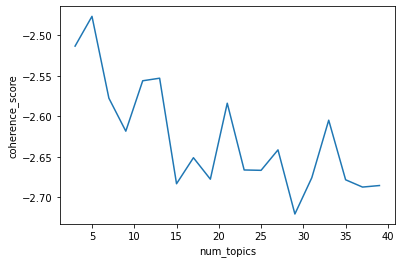

In [38]:
import seaborn as sns
 
ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling